# CA1 Data Cleaning and Preparation

In [16]:
# Importing libraries and packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
#using the pandas read_csv function we will get a DataFrame object. A DataFrame is a two-dimensional, size-mutable
population_df = pd.read_csv('PEA01.20231009T211038.csv')

In [18]:
#checking the first 10 rows of the data so that we can get idea of the dataset
population_df.head(10)

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
0,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,-,Both sexes,Thousand,293.8
1,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,1,Male,Thousand,149.2
2,PEA01,Population Estimates (Persons in April),1950,1950,205,0 - 4 years,2,Female,Thousand,144.6
3,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,-,Both sexes,Thousand,278.9
4,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,1,Male,Thousand,142.3
5,PEA01,Population Estimates (Persons in April),1950,1950,245,5 - 9 years,2,Female,Thousand,136.6
6,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,-,Both sexes,Thousand,262.1
7,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,1,Male,Thousand,133.4
8,PEA01,Population Estimates (Persons in April),1950,1950,265,10 - 14 years,2,Female,Thousand,128.7
9,PEA01,Population Estimates (Persons in April),1950,1950,300,15 - 19 years,-,Both sexes,Thousand,244.0


In [19]:
#By taking a look at the first 5 rows of the data we can have the following conclusion: 
#We have categorical variables - STATISTICS, STATISTIC Label, TLIST(A1)
#We have numerical variables - Year, C02076V02508 (identifier for the age group), C02199V02655 (code/identifier for the sex), VALUE
#We have qualitative variables - Age Group, Sex, Unit

In [20]:
#access the size of the dataset
print("There are", population_df.size, "values in total across the whole dataset")

There are 39960 values in total across the whole dataset


In [21]:
population_df.shape
#We have 3996 rows and 10 columns

(3996, 10)

In [22]:
#using the info() function so that we can check and understand the structure of the DataFrame and gain insights into the data it contains.
population_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3996 entries, 0 to 3995
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC        3996 non-null   object 
 1   STATISTIC Label  3996 non-null   object 
 2   TLIST(A1)        3996 non-null   int64  
 3   Year             3996 non-null   int64  
 4   C02076V02508     3996 non-null   int64  
 5   Age Group        3996 non-null   object 
 6   C02199V02655     3996 non-null   object 
 7   Sex              3996 non-null   object 
 8   UNIT             3996 non-null   object 
 9   VALUE            3885 non-null   float64
dtypes: float64(1), int64(3), object(6)
memory usage: 312.3+ KB


In [23]:
#another function to check only the data type
population_df.dtypes

STATISTIC           object
STATISTIC Label     object
TLIST(A1)            int64
Year                 int64
C02076V02508         int64
Age Group           object
C02199V02655        object
Sex                 object
UNIT                object
VALUE              float64
dtype: object

In [24]:
#this only works for continuous variables 
population_df.describe()

,TLIST(A1),Year,C02076V02508,VALUE
count,3996.000000,3996.000000,3996.000000,3885.000000
mean,1986.500000,1986.500000,457.500000,132.799382
std,21.362683,21.362683,128.946026,84.945660
min,1950.000000,1950.000000,205.000000,5.500000
25%,1968.000000,1968.000000,365.000000,71.700000
50%,1986.500000,1986.500000,485.000000,123.300000
75%,2005.000000,2005.000000,565.000000,167.000000
max,2023.000000,2023.000000,630.000000,427.700000


In [25]:
#if we want to include the objects we need the following but in our dataframe this doesn't give us a lot of useful information
population_df.describe(include=object)

,STATISTIC,STATISTIC Label,Age Group,C02199V02655,Sex,UNIT
count,3996,3996,3996,3996,3996,3996
unique,1,1,18,3,3,1
top,PEA01,Population Estimates (Persons in April),0 - 4 years,-,Both sexes,Thousand
freq,3996,3996,222,1332,1332,3996


In [26]:
#two methods to check if we have some null/missing values
#population_df.isnull().sum()
population_df.isna().sum()

STATISTIC            0
STATISTIC Label      0
TLIST(A1)            0
Year                 0
C02076V02508         0
Age Group            0
C02199V02655         0
Sex                  0
UNIT                 0
VALUE              111
dtype: int64

In [27]:
population_df[population_df['VALUE'].isna()]

,STATISTIC,STATISTIC Label,TLIST(A1),Year,C02076V02508,Age Group,C02199V02655,Sex,UNIT,VALUE
108,PEA01,Population Estimates (Persons in April),1952,1952,205,0 - 4 years,-,Both sexes,Thousand,NaN
109,PEA01,Population Estimates (Persons in April),1952,1952,205,0 - 4 years,1,Male,Thousand,NaN
110,PEA01,Population Estimates (Persons in April),1952,1952,205,0 - 4 years,2,Female,Thousand,NaN
162,PEA01,Population Estimates (Persons in April),1953,1953,205,0 - 4 years,-,Both sexes,Thousand,NaN
163,PEA01,Population Estimates (Persons in April),1953,1953,205,0 - 4 years,1,Male,Thousand,NaN
...,...,...,...,...,...,...,...,...,...,...
2377,PEA01,Population Estimates (Persons in April),1994,1994,205,0 - 4 years,1,Male,Thousand,NaN
2378,PEA01,Population Estimates (Persons in April),1994,1994,205,0 - 4 years,2,Female,Thousand,NaN
2430,PEA01,Population Estimates (Persons in April),1995,1995,205,0 - 4 years,-,Both sexes,Thousand,NaN
2431,PEA01,Population Estimates (Persons in April),1995,1995,205,0 - 4 years,1,Male,Thousand,NaN


In [28]:
#we will clean some of the columns as they won't be useful for our analysis

to_drop = ['STATISTIC Label', 'STATISTIC', 'TLIST(A1)', 'C02076V02508', 'C02199V02655']

population_df.drop(to_drop, inplace=True, axis=1)

In [29]:
population_df.head()

,Year,Age Group,Sex,UNIT,VALUE
0,1950,0 - 4 years,Both sexes,Thousand,293.8
1,1950,0 - 4 years,Male,Thousand,149.2
2,1950,0 - 4 years,Female,Thousand,144.6
3,1950,5 - 9 years,Both sexes,Thousand,278.9
4,1950,5 - 9 years,Male,Thousand,142.3


In [30]:
#checking all unique values we have for the Year column (integer)
population_df['Year'].unique()

array([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [33]:
#we will be looking at the data only for the past 20 years, so we would need to filter out the data so we create a new DataFrame which will have data from 2013 onwards
population_last_10_years_df = population_df[(population_df['Year'] > 2002)]

In [34]:
#confirming that we've filtered out the data
population_last_10_years_df.head()

,Year,Age Group,Sex,UNIT,VALUE
2862,2003,0 - 4 years,Both sexes,Thousand,284.3
2863,2003,0 - 4 years,Male,Thousand,145.4
2864,2003,0 - 4 years,Female,Thousand,138.9
2865,2003,5 - 9 years,Both sexes,Thousand,268.7
2866,2003,5 - 9 years,Male,Thousand,137.8


In [36]:
#checking all unique appearances in the Sex column
population_last_10_years_df['Sex'].unique()

array(['Both sexes', 'Male', 'Female'], dtype=object)

In [37]:
sex_totals = population_last_10_years_df.groupby('Sex')['VALUE'].sum().reset_index()

print(sex_totals)

          Sex    VALUE
0  Both sexes  49297.5
1      Female  24903.3
2        Male  24393.6


In [38]:
pivot_table = population_last_10_years_df.pivot_table(index=['Year', 'Sex'], values='VALUE', aggfunc='sum')

# Reset index to make 'Year' and 'Sex' regular columns
pivot_table.reset_index(inplace=True)

print(pivot_table)

    Year         Sex   VALUE
0   2014  Both sexes  4645.6
1   2014      Female  2346.3
2   2014        Male  2298.9
3   2015  Both sexes  4687.8
4   2015      Female  2370.1
5   2015        Male  2317.8
6   2016  Both sexes  4739.8
7   2016      Female  2393.1
8   2016        Male  2346.7
9   2017  Both sexes  4810.9
10  2017      Female  2430.0
11  2017        Male  2380.7
12  2018  Both sexes  4884.9
13  2018      Female  2465.4
14  2018        Male  2419.6
15  2019  Both sexes  4958.5
16  2019      Female  2502.0
17  2019        Male  2456.3
18  2020  Both sexes  5029.8
19  2020      Female  2538.3
20  2020        Male  2491.8
21  2021  Both sexes  5074.7
22  2021      Female  2560.8
23  2021        Male  2514.1
24  2022  Both sexes  5183.9
25  2022      Female  2621.9
26  2022        Male  2561.8
27  2023  Both sexes  5281.6
28  2023      Female  2675.4
29  2023        Male  2605.9


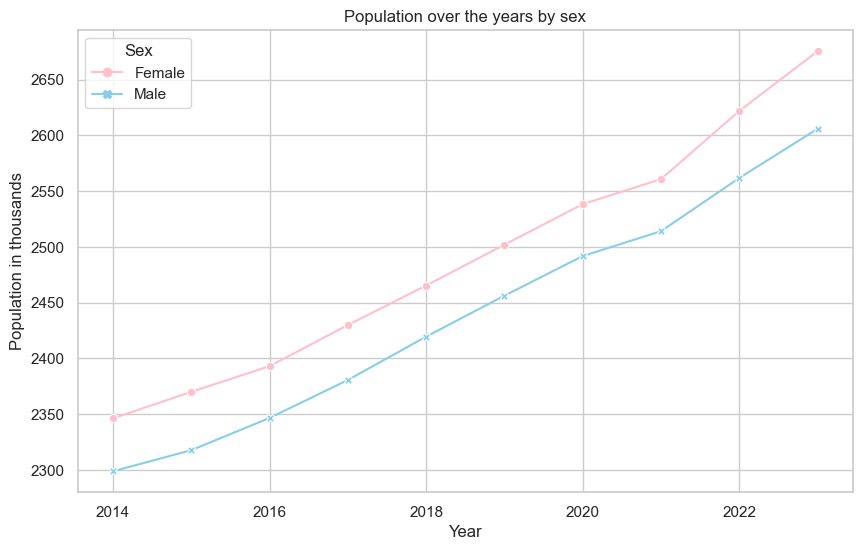

In [39]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

# Show the plot
plt.legend(title='Sex')
plt.show()

In the graprh representation above we can cleary see that the population of Ireland both for male and female has been increasing for the last ten years which automatically means that the population in general is increasing, which can be seen in the graph below.

Please keep in mind that those values are in thousands, which gives us a total of around 5.3 Million people in total for 2023. 

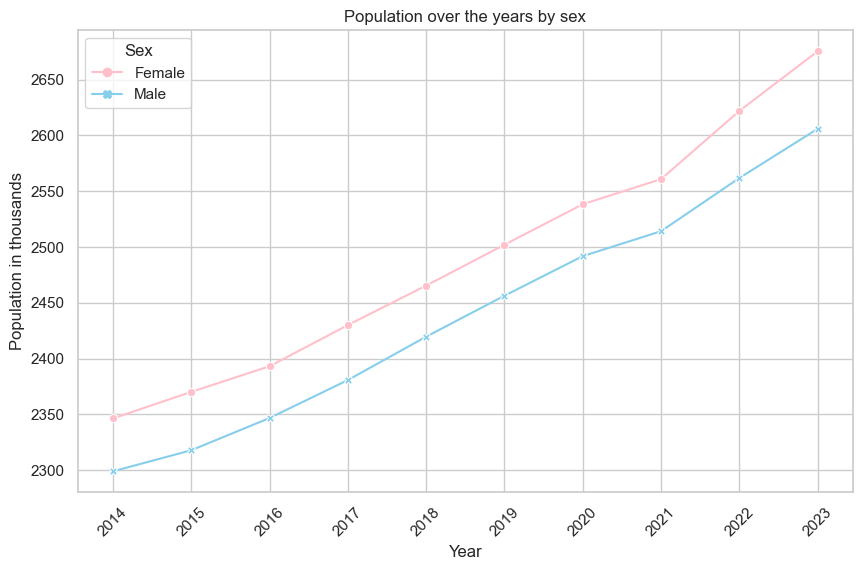

In [40]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] != 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Male': '#87CEEB', 'Female': '#FFC0CB'}

# Create the line plot
sns.lineplot(data=pivot_table,palette = custom_palette, markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in thousands')
plt.title('Population over the years by sex')

tick_positions = range(int(pivot_table.index.min()), int(pivot_table.index.max()) + 1)
plt.xticks(tick_positions, tick_positions, rotation=45)

# Show the plot
plt.legend(title='Sex')
plt.show()


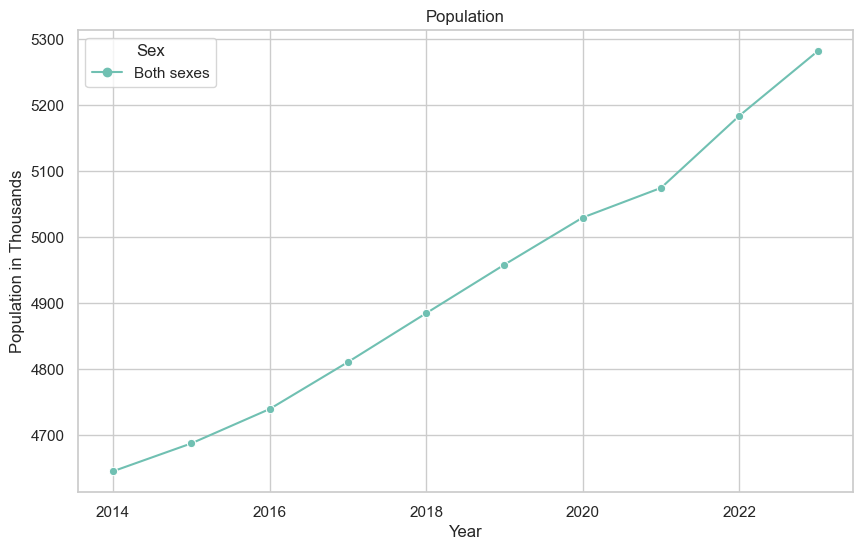

In [23]:
filtered_pivot_table = population_last_10_years_df[population_last_10_years_df['Sex'] == 'Both sexes']

pivot_table = filtered_pivot_table.pivot_table(index='Year', columns='Sex', values='VALUE', aggfunc='sum')

# Step 4: Create a line graph using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.set(style='whitegrid')  # Set the style of the plot

custom_palette = {'Both sexes': '#70c0b2'}

# Create the line plot
sns.lineplot(data=pivot_table, palette = custom_palette , markers = True, dashes=False)

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Population in Thousands')
plt.title('Population')

# Show the plot
plt.legend(title='Sex')
plt.show()